In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('mental_fem.csv')
data.head()


,ID,Age,Height_cm,Weight_kg,Ethnicity,Socioeconomic_Status,Depression_Score,Anxiety_Score,Self_Esteem_Score,Social_Support,...,Screen_Time,Diet_Quality,Parental_Mental_Illness,Sibling_Mental_Illness,Family_Income,Parental_Education,GPA,Attendance,Extracurriculars,Study_Hours
0,1,15,160,52,Hispanic,Middle,5,10,30,4,...,3,Good,No,No,55000,Bachelor's,3.8,95,3.0,10.0
1,2,17,155,49,Asian,High,15,12,25,3,...,5,Fair,Yes,Yes,75000,Master's,3.2,88,2.0,8.0
2,3,16,162,54,Caucasian,Low,7,9,27,5,...,4,Poor,No,No,50000,High School,3.5,90,1.0,7.0
3,4,15,165,68,African American,Middle,6,8,33,4,...,6,Good,Yes,No,45000,Bachelor's,3.9,92,4.0,12.0
4,5,18,170,58,Hispanic,High,12,15,28,3,...,7,Excellent,No,No,100000,PhD,3.7,85,NaN,NaN


In [9]:
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))




There is 2 missing data in our dataset 


In [10]:
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)

In [11]:
frame

,0,1,2
ID,0,62,int64
Age,0,6,int64
Height_cm,0,17,int64
Weight_kg,0,18,int64
Ethnicity,0,4,object
Socioeconomic_Status,0,4,object
Depression_Score,0,12,int64
Anxiety_Score,0,10,int64
Self_Esteem_Score,0,10,int64
Social_Support,0,4,int64


,Age,Height_cm,Weight_kg,Socioeconomic_Status,Depression_Score,Anxiety_Score,Self_Esteem_Score,Social_Support,Sleep_Hours,Physical_Activity,Screen_Time,Diet_Quality,Parental_Mental_Illness,Sibling_Mental_Illness,Family_Income,Parental_Education,GPA,Attendance,Extracurriculars,Study_Hours
0,15,160,52,Middle,5,10,30,4,8.0,4.5,3,Good,No,No,55000,Bachelor's,3.8,95,3.0,10.0
1,17,155,49,High,15,12,25,3,7.0,3.0,5,Fair,Yes,Yes,75000,Master's,3.2,88,2.0,8.0
2,16,162,54,Low,7,9,27,5,9.0,2.0,4,Poor,No,No,50000,High School,3.5,90,1.0,7.0
3,15,165,68,Middle,6,8,33,4,7.0,4.0,6,Good,Yes,No,45000,Bachelor's,3.9,92,4.0,12.0
4,18,170,58,High,12,15,28,3,6.5,5.0,7,Excellent,No,No,100000,PhD,3.7,85,NaN,NaN


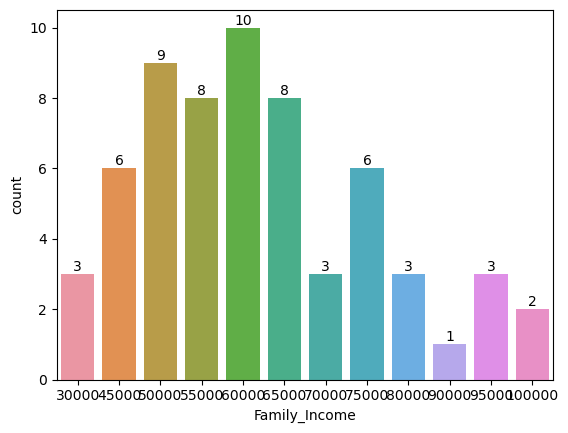

In [12]:
data['Family_Income'].unique()
ax = sns.countplot(data = data , x = 'Family_Income');
ax.bar_label(ax.containers[0]);
data = data.drop(columns=['ID'])
data = data.drop(columns=['Ethnicity'])
data.head()


In [13]:
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))


There is 2 missing data


In [15]:
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('Tehre is {} duplicated data:'.format(data.duplicated().sum()))


There is no duplicated data:


In [18]:
    data.drop_duplicates(inplace=True)
print('-'*50)
print(data.duplicated().sum())
data['Age'].unique()
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>21].index, inplace = True)
print(data['Age'].unique())




--------------------------------------------------
0
[15 17 16 18 19 14]


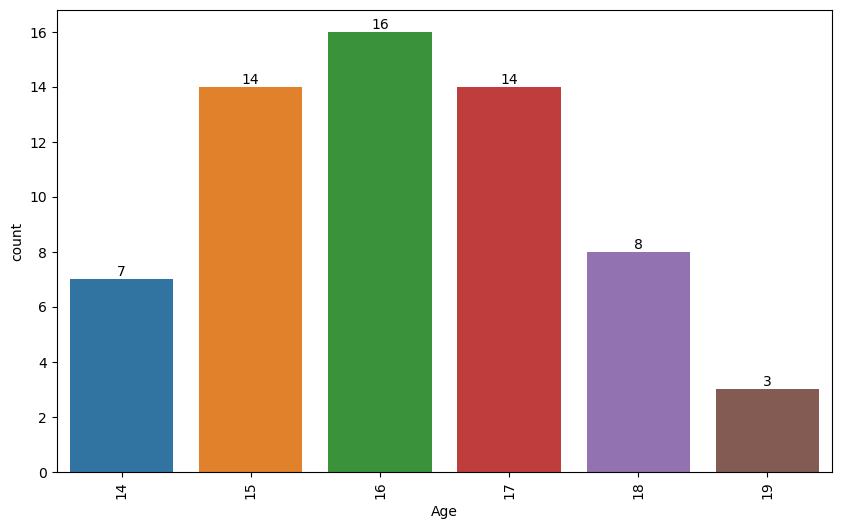

<Figure size 1000x600 with 0 Axes>

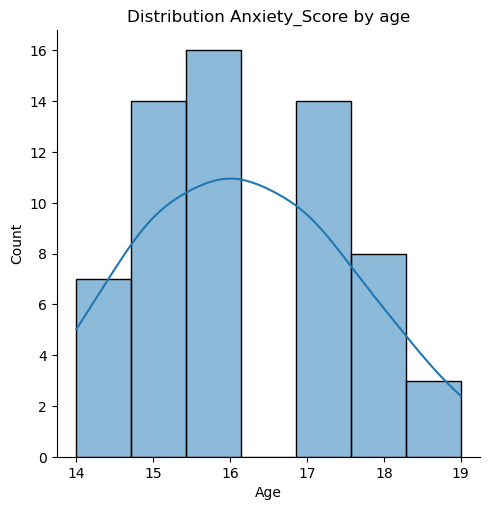

In [19]:
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'Anxiety_Score');
plt.title('Distribution Anxiety_Score by age');


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [21]:
columns_to_encode = ['Age', 'Height_cm', 'Weight_kg','Socioeconomic_Status', 'Depression_Score', 'Anxiety_Score', 'Self_Esteem_Score', 'Social_Support', 'Sleep_Hours', 'Physical_Activity', 'Screen_Time',  'Diet_Quality', 'Parental_Mental_Illness', 'Sibling_Mental_Illness', 'Family_Income', 'Parental_Education', 'GPA', 'Attendance', 'Extracurriculars', 'Study_Hours']

In [22]:
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns]) 
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      62 non-null     int64
 1   Height_cm                62 non-null     int64
 2   Weight_kg                62 non-null     int64
 3   Socioeconomic_Status     62 non-null     int32
 4   Depression_Score         62 non-null     int64
 5   Anxiety_Score            62 non-null     int64
 6   Self_Esteem_Score        62 non-null     int64
 7   Social_Support           62 non-null     int64
 8   Sleep_Hours              62 non-null     int64
 9   Physical_Activity        62 non-null     int64
 10  Screen_Time              62 non-null     int64
 11  Diet_Quality             62 non-null     int32
 12  Parental_Mental_Illness  62 non-null     int32
 13  Sibling_Mental_Illness   62 non-null     int32
 14  Family_Income            62 non-null     int64
 15  Parental

In [23]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Height_cm'] = MaxAbsScaler().fit_transform(data[['Height_cm']])
data['Weight_kg'] = MaxAbsScaler().fit_transform(data[['Weight_kg']])
data['Depression_Score'] = MaxAbsScaler().fit_transform(data[['Depression_Score']])
data['Anxiety_Score'] = MaxAbsScaler().fit_transform(data[['Anxiety_Score']])
data['Self_Esteem_Score'] = MaxAbsScaler().fit_transform(data[['Self_Esteem_Score']])
data['Social_Support'] = MaxAbsScaler().fit_transform(data[['Social_Support']])
data['Sleep_Hours'] = MaxAbsScaler().fit_transform(data[['Sleep_Hours']])
data['Physical_Activity'] = MaxAbsScaler().fit_transform(data[['Physical_Activity']])
data['Screen_Time'] =MaxAbsScaler().fit_transform(data[['Screen_Time']])
data['Family_Income'] = MaxAbsScaler().fit_transform(data[['Family_Income']])
data['GPA'] = MaxAbsScaler().fit_transform(data[['GPA']])
data['Attendance'] = MaxAbsScaler().fit_transform(data[['Attendance']])
data['Extracurriculars'] = MaxAbsScaler().fit_transform(data[['Extracurriculars']])
data['Study_Hours'] = MaxAbsScaler().fit_transform(data[['Study_Hours']])
data.describe()


,Age,Height_cm,Weight_kg,Socioeconomic_Status,Depression_Score,Anxiety_Score,Self_Esteem_Score,Social_Support,Sleep_Hours,Physical_Activity,Screen_Time,Diet_Quality,Parental_Mental_Illness,Sibling_Mental_Illness,Family_Income,Parental_Education,GPA,Attendance,Extracurriculars,Study_Hours
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.435484,0.485887,0.444023,1.258065,0.480938,0.465950,0.478495,0.526882,0.524194,0.577957,0.445161,1.516129,0.500000,0.419355,0.400293,1.693548,0.608295,0.451613,0.383065,0.437788
std,0.272268,0.289064,0.310659,1.100454,0.258384,0.283699,0.250955,0.292893,0.277982,0.289018,0.272016,1.051805,0.504082,0.497482,0.257372,1.362119,0.274895,0.262236,0.266726,0.232621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.176471,0.000000,0.272727,0.222222,0.333333,0.333333,0.333333,0.375000,0.200000,1.000000,0.000000,0.000000,0.181818,0.000000,0.428571,0.300000,0.250000,0.285714
50%,0.400000,0.437500,0.352941,1.000000,0.454545,0.444444,0.444444,0.666667,0.666667,0.500000,0.400000,2.000000,0.500000,0.000000,0.363636,2.000000,0.642857,0.500000,0.375000,0.428571
75%,0.600000,0.687500,0.750000,2.000000,0.636364,0.666667,0.666667,0.666667,0.791667,0.833333,0.600000,2.000000,1.000000,1.000000,0.545455,3.000000,0.857143,0.600000,0.500000,0.571429
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['Depression_Score'])
y = data.iloc[:, 6].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)


(55, 19) (55,)
------------------------------
(7, 19) (7,)
______________________________


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT


In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Example dataset (replace with your actual data)
X, y = np.random.rand(100, 5), np.random.rand(100)  # Replace with your data

# Convert continuous target (y) into discrete classes (e.g., 0 and 1)
y = (y > 0.5).astype(int)  # Example: thresholding to create two classes

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
steps_rfc = [('Scaler', StandardScaler()), ('clf', RFC(n_estimators=40))]
clf_rfc = Pipeline(steps=steps_rfc)

# Fit the pipeline with training data
clf_rfc.fit(X_train, y_train)

# Predict on the test set
y_pred_rfc = clf_rfc.predict(X_test)
print(y_pred_rfc)



[0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0]


In [36]:
!pip install scikit-plot

RFC accuracy: 55.00000000000001


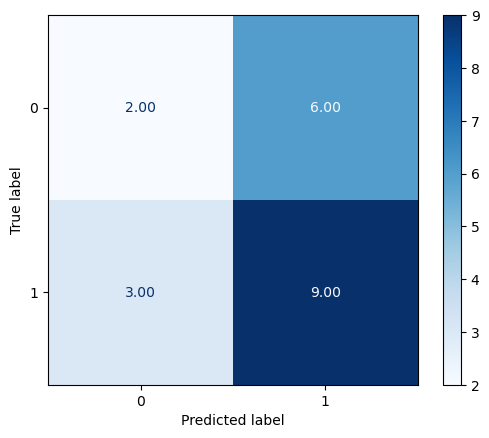

In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import numpy as np

# Example dataset (replace with your actual data)
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)  # Example binary classification data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
steps_rfc = [('Scaler', StandardScaler()), ('clf', RFC(n_estimators=40))]
clf_rfc = Pipeline(steps=steps_rfc)

# Fit the pipeline with training data
clf_rfc.fit(X_train, y_train)

# Predict on the test set
y_pred_rfc = clf_rfc.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix using Scikit-learn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='.2f')

# Print accuracy
print('RFC accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_rfc) * 100)


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

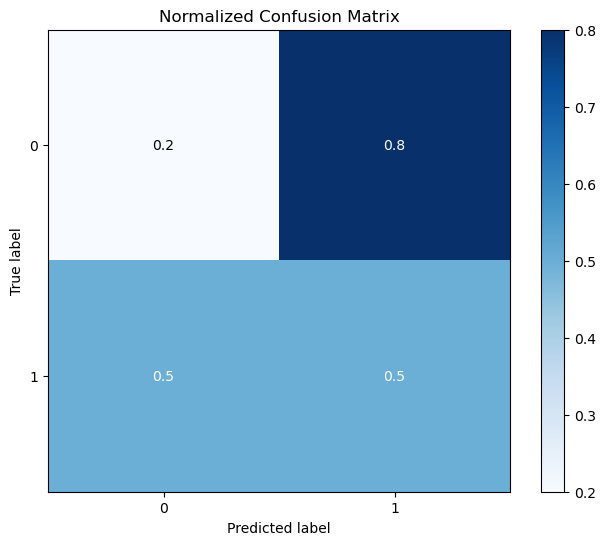

In [43]:
import scikitplot as skplt

# Plot confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(8, 6), normalize=True)


SVC accuracy: 45.0


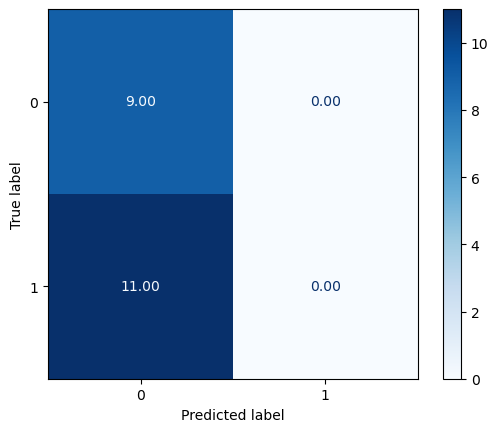

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example dataset (replace with your actual data)
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)  # Example binary classification data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for SVC
steps_svc = [('Scaler', StandardScaler()), ('clf', SVC(kernel='linear'))]
clf_svc = Pipeline(steps=steps_svc)

# Fit the pipeline with training data
clf_svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = clf_svc.predict(X_test)

# Plot confusion matrix using Scikit-learn
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='.2f')

# Print accuracy
print('SVC accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_svc) * 100)


DT accuracy: 40.0


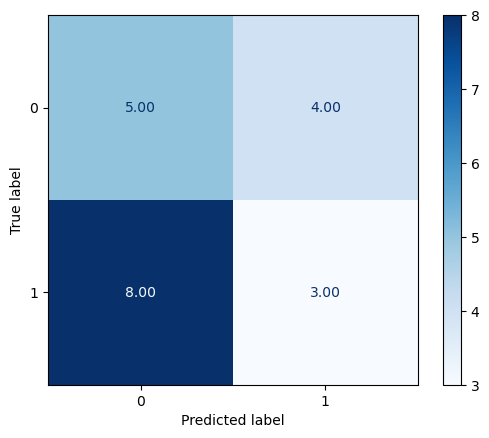

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example dataset (replace with your actual data)
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)  # Example binary classification data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline for Decision Tree
steps_dt = [('Scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))]
clf_dt = Pipeline(steps=steps_dt)

# Fit the pipeline with training data
clf_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = clf_dt.predict(X_test)

# Plot confusion matrix using Scikit-learn
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='.2f')

# Print accuracy
print('DT accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred_dt) * 100)
